In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X 

array([0.17897794, 0.40750888, 0.16872966, 0.50313959, 0.55188093,
       0.54412382, 0.14942424, 0.11320308, 0.55412876, 0.99771864,
       0.78996495, 0.34111518, 0.72553408, 0.41407587, 0.20009234,
       0.23847383, 0.39012803, 0.83535989, 0.39882516, 0.54463873,
       0.16011429, 0.56785116, 0.62424318, 0.95901338, 0.47922476,
       0.22862391, 0.13529782, 0.91349937, 0.08164691, 0.734856  ,
       0.59872694, 0.32878716, 0.68368732, 0.94903418, 0.67342578,
       0.6555726 , 0.64146823, 0.8650689 , 0.41553498, 0.08557867,
       0.77427558, 0.39092262, 0.45475394, 0.0241655 , 0.3886049 ,
       0.0225504 , 0.802313  , 0.47710871, 0.09450998, 0.88445364,
       0.93036975, 0.61041449, 0.62897916, 0.98832546, 0.94063569,
       0.80789699, 0.19207172, 0.63266111, 0.3819794 , 0.48647949,
       0.20089093, 0.89182513, 0.14175163, 0.61891503, 0.07257779,
       0.41576702, 0.13390413, 0.5650802 , 0.0931257 , 0.61227513,
       0.85536888, 0.14007836, 0.39958401, 0.2002205 , 0.61470

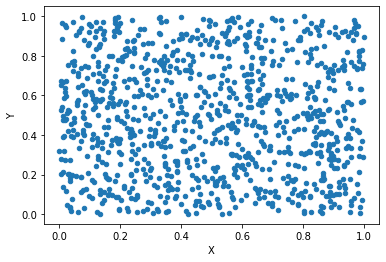

In [3]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



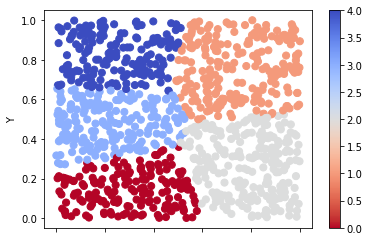

In [4]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) 

In [5]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ  

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [7]:
df_norm = norm_func(Univ.iloc[:,1:])  

In [8]:
df_norm.head(10)  # Top 10 rows
 

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


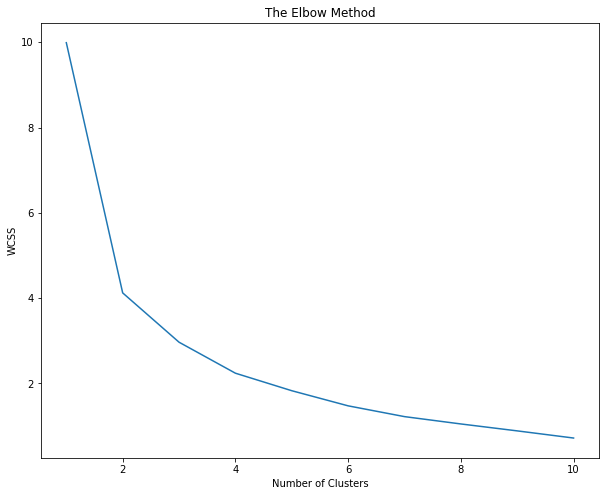

In [9]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [10]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  

In [11]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([1, 2, 4, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 4, 1, 4, 1,
       1, 0, 3])

In [12]:
y_kmeans 

array([1, 2, 4, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 4, 1, 4, 1,
       1, 0, 3])

In [13]:
clf.cluster_centers_ 

array([[0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333],
       [0.65718157, 0.72222222, 0.2748538 , 0.33918129, 0.28414929,
        0.78888889],
       [0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.87456446, 0.88095238, 0.09774436, 0.2406015 , 0.48789238,
        0.91904762],
       [0.54065041, 0.63888889, 0.54824561, 0.42105263, 0.179354  ,
        0.37777778]])

In [14]:
clf.inertia_

1.6781326840746353

In [15]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ 

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [16]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean() 

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
4,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333


In [17]:
plt.style.use(['classic']) 
print(plt.style.available)   

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

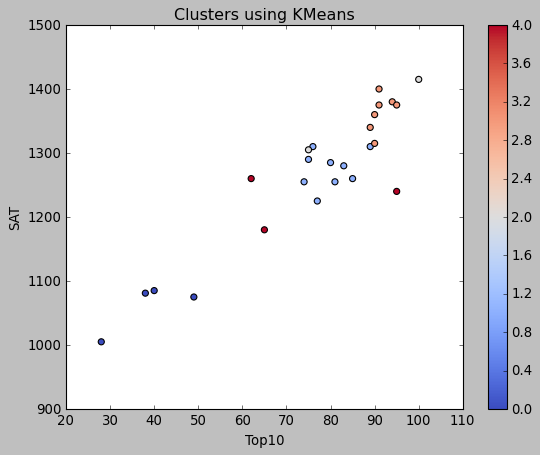

In [18]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [19]:
WCSS  

[9.988235196638557,
 4.123452442397179,
 2.967474100484397,
 2.24094486741605,
 1.8304091722018203,
 1.4758031742849496,
 1.2231191711566014,
 1.051229310979934,
 0.888913291780961,
 0.7212370830526206]